# Dataset Visualization and Analysis

In this notebook, we will see how GSV-Cities is organized, how to navigate it and finally show examples of some places.

To make it work correctly without changing much code you should have the sf, gsv and tokyo datasets available [here](https://drive.google.com/drive/folders/1Ucy9JONT26EjDAjIJFhuL9qeLxgSZKmf?usp=share_link) extracted in the same folder from where you are executing this notebook

In [8]:
import numpy as np 
import pandas as pd
import os

## Function to define the metadata dataframe from the dataset path

In [10]:
heading = ["UTM_easting", "UTM_northing", "UTM_zone_number", "UTM_zone_letter", "latitude", "longitude", "pano_id", "tile_num", "heading", "pitch", "roll", "height", "timestamp", "note", "extension"]

def dfs_dic_from_path(base_path):
    # List all the directories in the base_path
    dirs = [filename for filename in os.listdir(base_path) if os.path.isdir(base_path+filename)]
    # Create a dictionary containing a key-value pair for each directory, where:
    # key = name of the directory
    # value = Pandas DataFrame containing all the metadata of the images in the directory
    dfs = {directory: pd.DataFrame(data=[filename.split('@')[1:] for filename in os.listdir(base_path+directory)], columns=heading) for directory in dirs}
    return dfs

## Define the metadata dataframes from the various dataset paths

In [11]:
folders = {"tokyo_xs_test": "./tokyo_xs/test/",
           "sf_xs_train": "./sf_xs/train/",
           "sf_xs_val": "./sf_xs/val/",
           "sf_xs_test": "./sf_xs/test/",
           "gsv_xs_train": "./gsv_xs/train/"
           }
dfs = {name: dfs_dic_from_path(path) for (name,path) in folders.items()}

## For each dataset folder print some metadata
In this case we decided to print:
- images count
- min-max latitude
- mix-max longitude

It is very customizable since it is based on Pandas dataframes

In [9]:
for (dataset, df) in dfs.items():
    for name in df.keys():
        print(f'''{dataset}_{name}:
              images count: {len(df[name].index)},
              min-max latitude: {df[name]["latitude"].apply(pd.to_numeric).min()}, {df[name]["latitude"].apply(pd.to_numeric).max()}
              min-max longitude: {df[name]["longitude"].apply(pd.to_numeric).min()}, {df[name]["longitude"].apply(pd.to_numeric).max()}''')

tokyo_xs_test_database:
              images count: 12771,
              min-max latitude: 35.65181, 35.66439
              min-max longitude: 139.68987, 139.70666
tokyo_xs_test_queries:
              images count: 315,
              min-max latitude: 35.65237, 35.6623
              min-max longitude: 139.69112, 139.70598
sf_xs_train_37.76:
              images count: 6915,
              min-max latitude: 37.76, 37.76999
              min-max longitude: -122.51063, -122.38738
sf_xs_train_37.71:
              images count: 4329,
              min-max latitude: 37.71, 37.71999
              min-max longitude: -122.50018, -122.38155
sf_xs_train_37.78:
              images count: 7250,
              min-max latitude: 37.78, 37.78999
              min-max longitude: -122.5111, -122.38778
sf_xs_train_37.79:
              images count: 5142,
              min-max latitude: 37.79, 37.79999
              min-max longitude: -122.4815, -122.38893
sf_xs_train_37.70:
              images count: 307

### An example of what's contained in a metadata dataframe

In [19]:
dfs["gsv_xs_train"]["bangkok"]

,UTM_easting,UTM_northing,UTM_zone_number,UTM_zone_letter,latitude,longitude,pano_id,tile_num,heading,pitch,roll,height,timestamp,note,extension
0,0666367.87,1520862.86,47,P,013.75229,0100.53877,qzcgO1WeDI2Ak7Xj4iodBw,,312,,,,201709,3272_Bangkok,.jpg
1,0661396.87,1519267.98,47,P,013.73816,0100.49271,LzdzBHRrtcT5biAsBpV9PQ,,083,,,,201909,2007_Bangkok,.jpg
2,0667083.91,1522420.67,47,P,013.76633,0100.54548,Pncig0g4fMx2CrLPQ0jkig,,316,,,,201810,4497_Bangkok,.jpg
3,0664644.00,1520283.73,47,P,013.74715,0100.52280,v_swD6Pqm-mCJE_BpPtuXw,,529,,,,201706,2823_Bangkok,.jpg
4,0669332.41,1521784.61,47,P,013.76045,0100.56624,tcnGCb5mTtTJPtya7GCzrw,,477,,,,201112,3999_Bangkok,.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266,0665668.19,1522200.33,47,P,013.76442,0100.53238,EvlpLx5vfqO_jTvMuiSXiQ,,616,,,,202009,4315_Bangkok,.jpg
22267,0665106.67,1516813.64,47,P,013.71576,0100.52687,xlDgsE0KhetaDiney9MHoQ,,403,,,,201908,130_Bangkok,.jpg
22268,0666029.22,1519874.08,47,P,013.74337,0100.53558,UdXFk7z84x8RhmvMbAwdqQ,,552,,,,201711,2489_Bangkok,.jpg
22269,0669088.26,1518009.13,47,P,013.72634,0100.56375,_oxv1BNhz6EQjmOqxtFnzw,,441,,,,201706,1041_Bangkok,.jpg


#### This is how the same place is represented in the gsv case

In [12]:
bangkok_example = dfs["gsv_xs_train"]["bangkok"][dfs["gsv_xs_train"]["bangkok"]["note"] == "3272_Bangkok"]
bangkok_example

,UTM_easting,UTM_northing,UTM_zone_number,UTM_zone_letter,latitude,longitude,pano_id,tile_num,heading,pitch,roll,height,timestamp,note,extension
0,0666367.87,1520862.86,47,P,013.75229,0100.53877,qzcgO1WeDI2Ak7Xj4iodBw,,312,,,,201709,3272_Bangkok,.jpg
6140,0666367.17,1520863.02,47,P,013.75229,0100.53876,2y9Fv15r8ZMjG8uqGopI1w,,310,,,,201810,3272_Bangkok,.jpg
7438,0666367.47,1520863.36,47,P,013.75229,0100.53877,es2lasBUFouthqZjx8TGZQ,,328,,,,202008,3272_Bangkok,.jpg
8089,0666366.04,1520859.53,47,P,013.75226,0100.53875,trDDMqM2rK0ur36wEUyiww,,322,,,,201706,3272_Bangkok,.jpg
8588,0666366.81,1520867.11,47,P,013.75233,0100.53876,unM59fpDcKDx6P1io9DzfA,,494,,,,201801,3272_Bangkok,.jpg
20809,0666367.11,1520862.33,47,P,013.75229,0100.53876,CjRwaMS9UxyvBw0Jk5vRxg,,317,,,,201109,3272_Bangkok,.jpg
22047,0666366.80,1520861.86,47,P,013.75228,0100.53876,OYf0aNQBUg8TtQwebZ8PnA,,326,,,,201611,3272_Bangkok,.jpg


## Define the function to print all the pictures from a same place
gsv, tokyo and sf datasets are slightly different so it might be necessary to adapt what is printed as the image title

In [14]:
import PIL.Image as Image
from matplotlib import pyplot as plt

def get_img_name(row):
    return '@'+row.str.cat(sep='@')

def show_images_from_place(place_df, city_name, dataset_name, nb_images=4):
    '''Given a dataframe containing A PLACE (one place, which is a small set of images that depict the same location)
    we show a maximum of "nb_images" from that place'''
    
    nb_images = min(nb_images, len(place_df))
    rows = int(np.sqrt(nb_images))
    columns = nb_images // rows + int((nb_images % rows) > 0)

    fig = plt.figure(figsize=(3*columns, 3*rows))
    # TODO change the title if necessary
    plt.title(f"{city_name}-{dataset_name}: {place_df.iloc[0].note}")
    plt.axis('off')
    plt.tight_layout()
    
    # we randomly sample nb_images images from place_df
    place_df = place_df.sample(n=nb_images)
    
    for i, (place_id, row) in enumerate(place_df.iterrows()):
        img_name = get_img_name(row)
        img_path = folders[city_name] + dataset_name +'/' + img_name
        img = Image.open(img_path)
        
        # add image to subplot
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.tight_layout()

Here, as an example, we print all the pictures taken in the same place in Bangkok

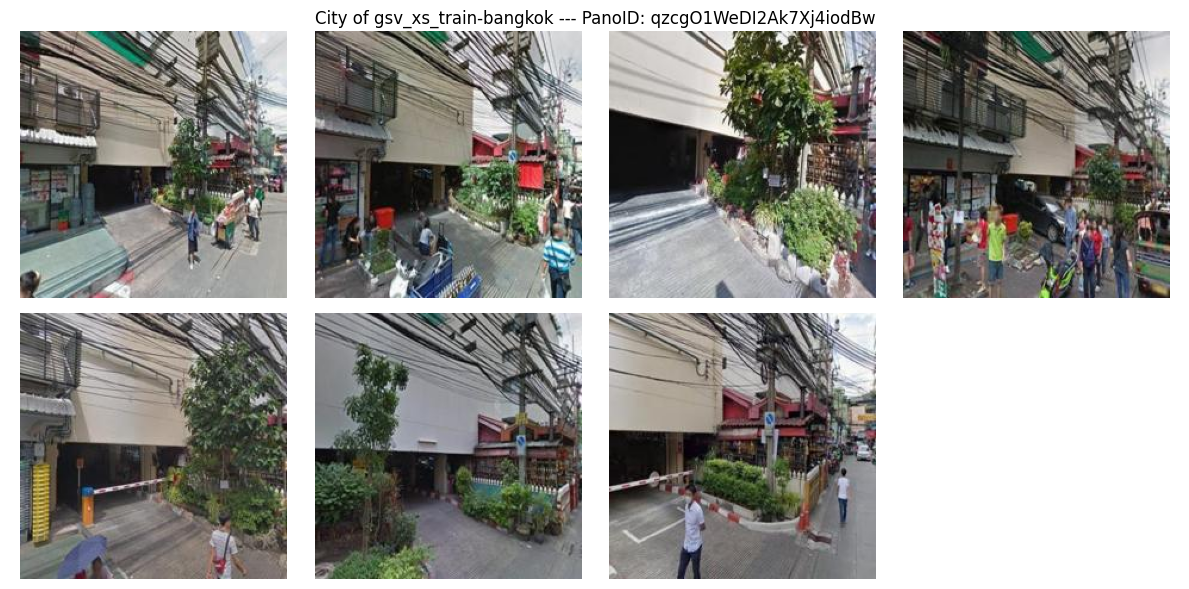

In [15]:
show_images_from_place(bangkok_example, "gsv_xs_train", "bangkok", nb_images=8)

## Print the distribution of where the pictures were taken on a map

In [16]:
import plotly.express as px

fig = px.scatter_mapbox(dfs["gsv_xs_train"]["bangkok"][["latitude","longitude"]].apply(pd.to_numeric),
                        lat='latitude', lon = 'longitude',
                        mapbox_style='open-street-map', zoom=12,
                        width=1000, height=500,
                        )
fig.show()